# EDA

## Muestra de imágenes

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_path = "../data_acquisition/test"
train_path = "../data_acquisition/train"

data = ImageDataGenerator(
    rescale=1.0 / 255)

batch_size = 32
image_size = (250, 250)

test_generator = data.flow_from_directory(
    test_path ,
    target_size=image_size,
    batch_size=batch_size
)

train_generator = data.flow_from_directory(
    train_path ,
    target_size=image_size,
    batch_size=batch_size
)

Found 3829 images belonging to 1680 classes.
Found 7534 images belonging to 1680 classes.


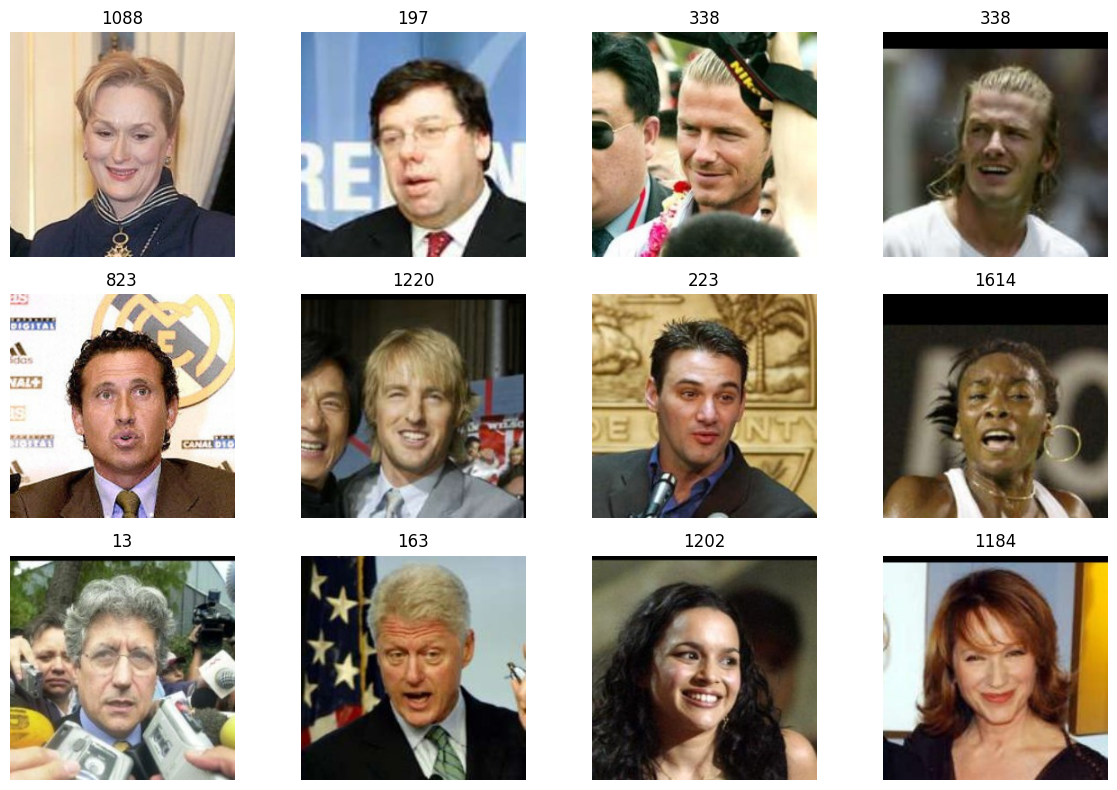

In [9]:
import matplotlib.pyplot as plt
import numpy as np

batch = next(train_generator)

images, labels = batch
class_names = list(train_generator.class_indices.keys())

random_indices = np.random.choice(len(images), 12, replace=False)

plt.figure(figsize=(12, 8))

for i, index in enumerate(random_indices):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[index])
    plt.title(class_names[np.argmax(labels[index])])
    plt.axis('off')

plt.tight_layout()
plt.show()

Como se puede observar las imágenes a usar son fotografías de personas de 250x250 a color en formato jpg.
El conjunto de datos ya viene preprocesado

## Imágenes por clase

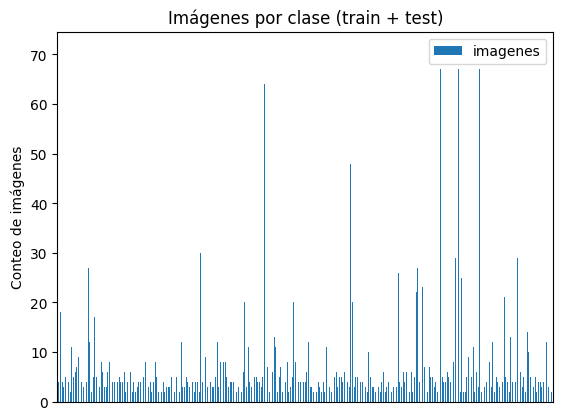

In [30]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


clases_totales = np.concatenate((train_generator.classes, test_generator.classes))

value_counts = Counter(clases_totales)

df = pd.DataFrame(value_counts.items(), columns=['indice', 'imagenes'])

# Plot the DataFrame as a bar chart
df.plot(x='indice', y='imagenes', kind='bar')

# Add labels and a title
plt.ylabel('Conteo de imágenes')
plt.title('Imágenes por clase (train + test)')
plt.gca().axes.get_xaxis().set_visible(False)
# Show the plot
plt.show()

In [33]:
print(f"Como se puede observar del gráfico anterior se tiene variedad en las imágenes por cada clase, con un rango desde {df['imagenes'].min()} hasta {df['imagenes'].max()} imágenes.")

Como se puede observar del gráfico anterior se tiene variedad en las imágenes por cada clase, con un rango desde 2 hasta 71 imágenes.


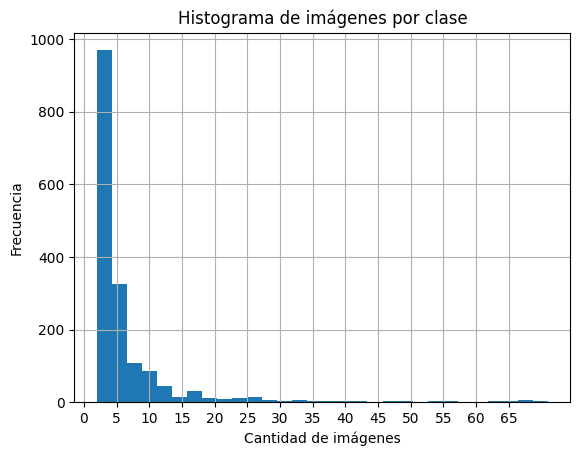

In [45]:
#histograma
plt.hist(df['imagenes'], bins=30)
plt.xlabel('Cantidad de imágenes')
plt.xticks(np.arange(0, 70, 5))
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Histograma de imágenes por clase')
plt.show()

Tenemos una gran cantidad de clases con imágenes inferiores a 5, puede generar errores en la inferencia.

In [47]:
df[df['imagenes'] >=5]

,indice,imagenes
0,0,6
2,2,5
6,6,6
10,10,18
11,11,39
...,...,...
1669,1669,15
1670,1670,6
1671,1671,8
1672,1672,9


Si consideramos un filtro de clases con una cantidad de imágenes mayor a 5, solo tendríamos 711 de las 1680 iniciales.